In [1]:
# 1) Load the dataset
import pandas as pd

telco_df = pd.read_csv('/content/Telco-Customer-Churn.csv')
print(telco_df.columns)
telco_df.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#2. Cleaning, handling missing values, replace/drop missing values, columnlists, convert variables


# Removing missing values
telco_df.dropna(inplace=True)

# Remove customer IDs from the dataset (assuming 'customerID' is the first column)
telco_df = telco_df.iloc[:, 1:]

# Converting the 'Churn' predictor variable to binary numeric values
telco_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_df['Churn'].replace(to_replace='No', value=0, inplace=True)

# Convert all the categorical variables into dummy variables
telco_df_dummies = pd.get_dummies(telco_df)

# Display the first few rows of the DataFrame with dummy variables
telco_df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


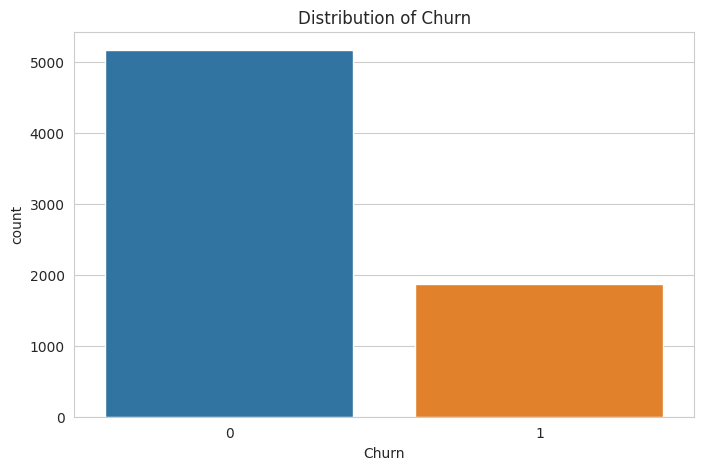

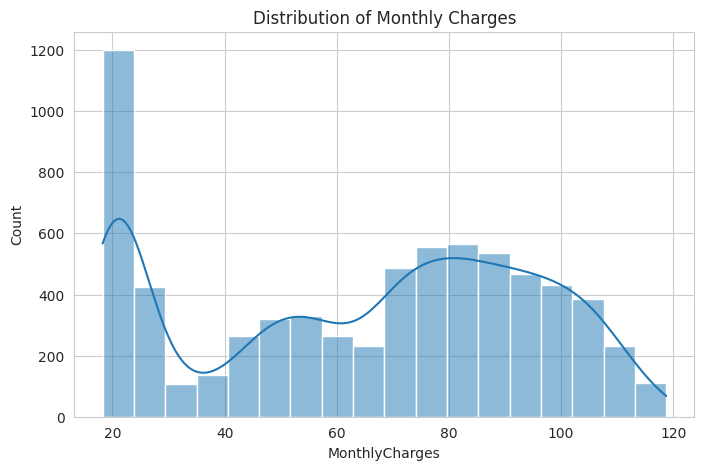

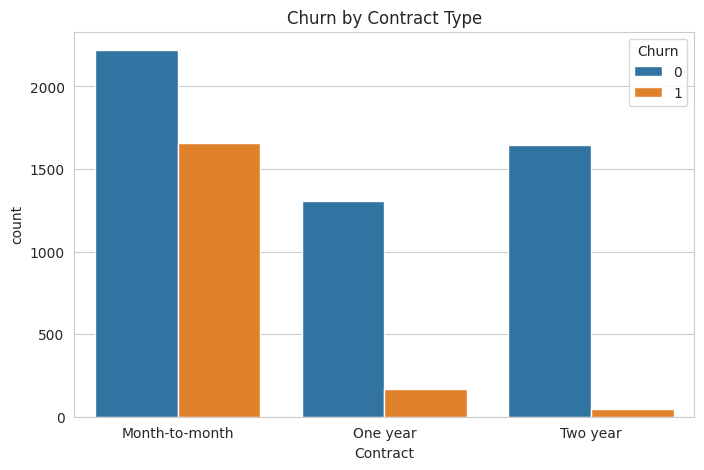

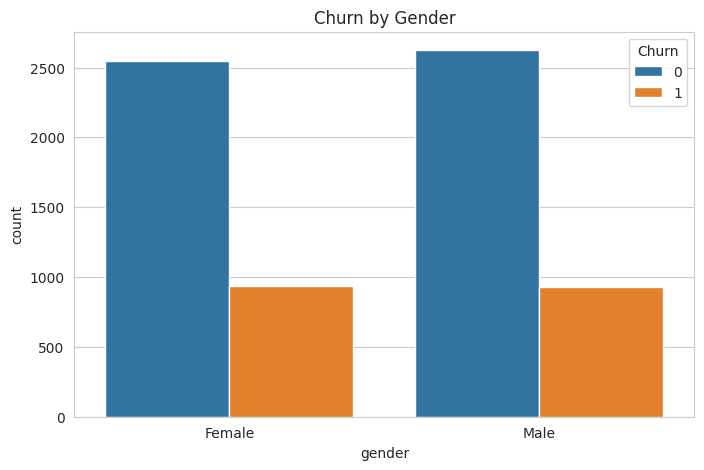

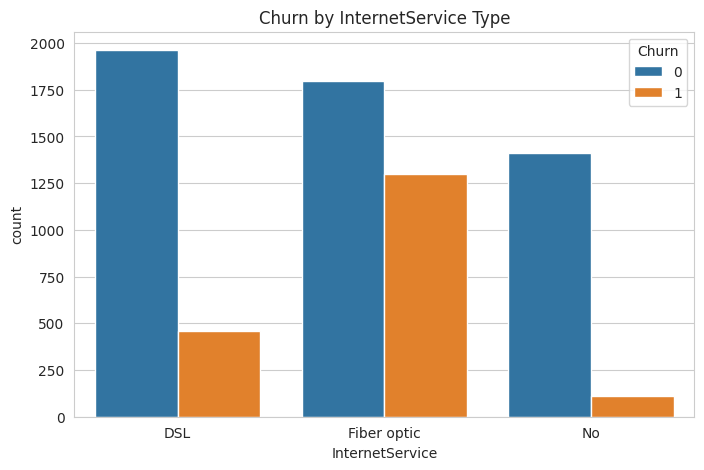

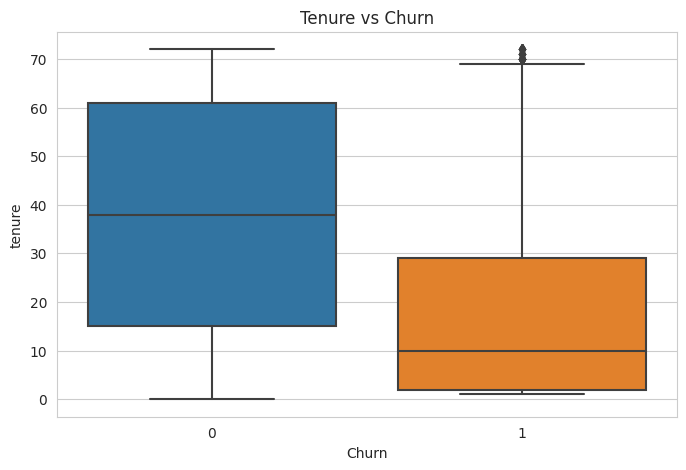

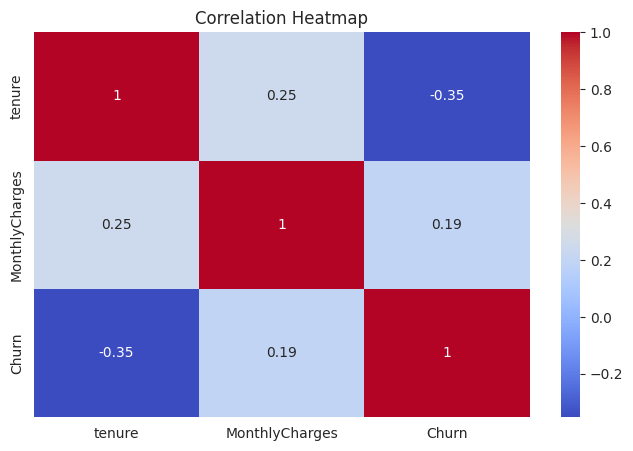

In [3]:
#3) Visualization of the data

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for Seaborn plots
sns.set_style("whitegrid")

# 1. Distribution of Churn
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# 2. Distribution of MonthlyCharges
plt.figure(figsize=(8,5))
sns.histplot(data=telco_df, x='MonthlyCharges', kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

# 3. Churn by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# 4. Churn by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

# 5. Churn by InternetService Type
plt.figure(figsize=(8,5))
sns.countplot(data=telco_df, x='InternetService', hue='Churn')
plt.title('Churn by InternetService Type')
plt.show()

# 6. Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=telco_df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

# 7. Correlation Heatmap
correlations = telco_df[['tenure', 'MonthlyCharges', 'Churn']].corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# 4. Modeling

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt="d",
                cmap=plt.cm.Blues,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# 4.a) Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data
X = telco_df_dummies.drop('Churn', axis=1)  # Features
y = telco_df_dummies['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000) # increased max_iter for convergence
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# 1. Scatter Plot
# Assuming you're doing a simple linear regression with 'MonthlyCharges' as predictor and 'TotalCharges' as response
X = telco_df[['MonthlyCharges']].values
y = telco_df['TotalCharges'].values

reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Scatter plot of MonthlyCharges vs. TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

# 2. Residuals vs Fitted Values
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# 3. Histogram of the residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')
plt.show()

# 4. Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

In [ ]:
#4.b) Ridge Regression

from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression:")
print(classification_report(y_test, y_pred_ridge))

# Ridge Regression
plot_confusion_matrix(y_test, y_pred_ridge, "Confusion Matrix for Ridge Regression")


In [ ]:
#4.d) Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Trees:")
print(classification_report(y_test, y_pred_tree))


#Decision Trees
plot_confusion_matrix(y_test, y_pred_tree, "Confusion Matrix for Decision Trees")



In [ ]:
#4.e) Decision Forest
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_forest))

#Random Forest
plot_confusion_matrix(y_test, y_pred_forest, "Confusion Matrix for Random Forest")
y_score_forest = forest_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_forest, "ROC Curve for Random Forest")



In [ ]:
#4.f) KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for this example
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN:")
print(classification_report(y_test, y_pred_knn))


# KNN
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix for KNN")
y_score_knn = knn_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_knn, "ROC Curve for KNN")


In [ ]:
#4.g) Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

#Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix for Naive Bayes")
y_score_nb = nb_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_score_nb, "ROC Curve for Naive Bayes")